## Predicting Survival on the Titanic using Logistic Regression

I made two models, first with the independent variables sex, age, ssibsp and parch to predict the dependent variable survived. 
Second, with the independent variables sex, age, ssibsp, parch and Pclass. 

Note: I found that these are the most relevant variables to predict the survival rate. Also I googled the meaning of ssibsp and parch and found that it means Number of Siblings/Spouses Aboard and Number of Parents/Children Aboard respectively, which I found relevent to predict the survival rate.


In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#reading the data from the disk into memory
df = pd.read_csv("train.csv")

In [3]:
#Just a reminder, here are all the column names
df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

# Model with ndependent variables sex, age, ssibsp and parch

In [4]:
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['sibsp'] = df['SibSp']
X['parch'] = df['Parch']


In [9]:
y = df['Survived']

In [10]:
#IMPORTANT! get_dummies returns an indicator variable for each category.
#Refering back to my talk on encoding variables, it's important to drop one category
#Otherwise you'll have two perfectly colinear variables.   

#Here, since I only have two variables it's easy, I'll just take one, and reassign it to sex
#so now Sex becomes female = 1, male = 0
X['sex'] = pd.get_dummies(X.sex)['female']

In [11]:
X


,sex,age,sibsp,parch
0,0.0,22.0,1,0
1,1.0,38.0,1,0
2,1.0,26.0,0,0
3,1.0,35.0,1,0
4,0.0,35.0,0,0
5,0.0,NaN,0,0
6,0.0,54.0,0,0
7,0.0,2.0,3,1
8,1.0,27.0,0,2
9,1.0,14.0,1,0


In [12]:
#replacing missing value in age with 
meanAge = X['age'].mean()
X['age'] = X['age'].fillna(meanAge)

In [13]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [15]:
#building test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=10)

In [17]:
model.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
from sklearn.metrics import accuracy_score
print "Logistic accuracy is %2.2f" % accuracy_score(y_test,model.predict(X_test))

Logistic accuracy is 0.78


In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [22]:
print "\n\n---Logistic Model---"
#logistic AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test) )



---Logistic Model---
Logistic AUC = 0.77
             precision    recall  f1-score   support

          0       0.80      0.84      0.82       105
          1       0.75      0.70      0.73        74

avg / total       0.78      0.78      0.78       179



In [23]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

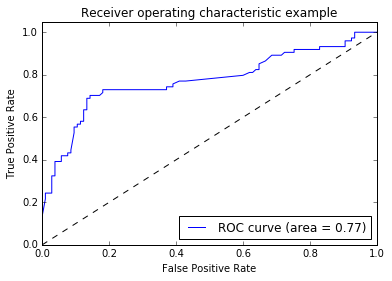

In [24]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Model with ndependent variables sex, age, ssibsp, parch and Pclass

In [37]:
x = pd.DataFrame()
x['sex'] = df['Sex']
x['age'] = df['Age']
x['sibsp'] = df['SibSp']
x['parch'] = df['Parch']
x['pclass'] = df['Pclass']

In [38]:
x['sex'] = pd.get_dummies(x.sex)['female']

In [39]:
x = x.join(pd.get_dummies(df.Pclass, prefix='pclass'))
x = x.drop(['pclass_1', 'pclass'], axis=1)

In [40]:
meanAge = x['age'].mean()
x['age'] = x['age'].fillna(meanAge)

In [41]:
scaler = StandardScaler()
x= scaler.fit_transform(x)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
model.fit(x_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
print "Logistic accuracy is %2.2f" % accuracy_score(y_test,model.predict(x_test))

Logistic accuracy is 0.82


In [45]:
print "\n\n---Logistic Model---"
#logistic AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(x_test) )



---Logistic Model---
Logistic AUC = 0.81
             precision    recall  f1-score   support

          0       0.82      0.89      0.85       105
          1       0.82      0.73      0.77        74

avg / total       0.82      0.82      0.82       179



In [47]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

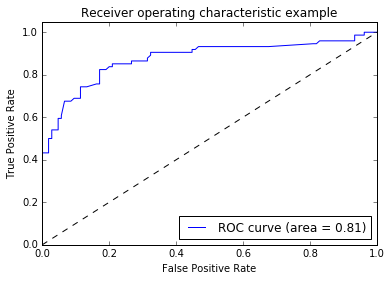

In [48]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### Thus it was found that, analysing the prediction by omitting Pclass, i.e. by using the just independent variables sex, age, ssibsp and parch, AUC was 0.77. But after using Pclass the AUC improved to .81